# Project : EventManagementSystem
## Purpose :
An Event Management System (EMS) serves as a centralized platform for efficiently planning, organizing, and executing a wide range of events. It streamlines the entire event lifecycle, from initial planning and registration to onsite management and post-event analysis. One of the primary purposes of an EMS is to simplify the often complex process of event planning by providing a suite of tools and features. These tools enable event organizers to create detailed event schedules, manage budgets, coordinate logistics such as venue selection and equipment rental, and facilitate seamless communication among team members and stakeholders.

### Step 0 : Downloading Necessary packages

In [1]:
!pip install mysql-connector-python
!pip install pandas
!pip install matplotlib

### Step 1 : Importing necessary packages

In [2]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for data visualization

### Step 2 : Establishing Connection (Database connectivity from python to mysql database)


In [20]:
# Connecting to MySQL database using mysql-connector-python
connection = mysql.connector.connect(
user='root',
password='abhi123',
host='localhost',
database= 'eventmanagement'
)

### Step 3 : Data View


In [24]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'restaurant' table
cursor.execute('SELECT * FROM locations')
#After fetching data from the database we are storing it into Pandas DataFrame
locations_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(locations_data.head())

   location_id                            name               address  capacity
0            1             Sunset Beach Resort  123 Ocean View Drive        50
1            2  Green Valley Convention Center       456 Park Avenue       100
2            3                 Riverside Hotel   789 Riverfront Road        75
3            4             Mountain View Lodge    101 Mountain Trail       120
4            5              Golden Sands Hotel   246 Beach Boulevard        90


In [25]:
# Query data from the 'customers' table
cursor.execute('SELECT * FROM events')
# Fetch the data from the cursor and store it into a Pandas DataFrame
events_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(events_data.head())

   event_id                    name  \
0         1    Tech Conference 2024   
1         2          Music Festival   
2         3           Art Expo 2024   
3         4    Business Summit 2024   
4         5  Health & Wellness Fair   

                                         description        date  \
0       A conference about the latest in technology.  2024-07-20   
1     An outdoor music festival with multiple bands.  2024-08-15   
2            An exhibition showcasing local artists.  2024-09-05   
3  Annual summit for business leaders and entrepr...  2024-06-10   
4              A fair promoting health and wellness.  2024-07-25   

             time  location_id  capacity  
0 0 days 09:00:00            1       500  
1 0 days 10:00:00            3      1000  
2 0 days 11:00:00            2       300  
3 0 days 08:30:00            4       450  
4 0 days 09:00:00            5       600  


In [26]:
# Query data from the 'customers' table
cursor.execute('SELECT * FROM participants')
# Fetch the data from the cursor and store it into a Pandas DataFrame
participants_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(participants_data.head())

   participant_id           name                email        phone  \
0             139  Alice Johnson    alice@example.com  +1234567890   
1             140      Bob Smith      bob@example.com  +1987654321   
2             141  Charlie Brown  charlie@example.com  +1122334455   
3             142   Diana Miller    diana@example.com  +1555666777   
4             143  Eleanor Davis  eleanor@example.com  +1888999900   

  registration_status  
0          Registered  
1          Registered  
2          Registered  
3          Registered  
4          Registered  


In [27]:
# Query data from the 'customers' table
cursor.execute('SELECT * FROM organizers')
# Fetch the data from the cursor and store it into a Pandas DataFrame
organizers_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(organizers_data.head())

   organizer_id           name                email        phone  \
0             1  Alice Johnson    alice@example.com  +1234567890   
1             2      Bob Smith      bob@example.com  +1987654321   
2             3  Charlie Brown  charlie@example.com  +1122334455   
3             4   Diana Miller    diana@example.com  +1555666777   
4             5  Eleanor Davis  eleanor@example.com  +1888999900   

                    role  
0      Event Coordinator  
1      Marketing Manager  
2  Logistics Coordinator  
3     Technical Director  
4  Volunteer Coordinator  


In [28]:
# Query data from the 'customers' table
cursor.execute('SELECT * FROM sessions')
# Fetch the data from the cursor and store it into a Pandas DataFrame
sessions_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(sessions_data.head())

   session_id                 title       speaker       time_slot       room  \
0           1       Opening Keynote      Dr. Tech 0 days 09:30:00  Main Hall   
1           2            AI in 2024      Prof. AI 0 days 11:00:00   Room 101   
2           3      Closing Ceremony    Mr. Finale 0 days 16:00:00  Main Hall   
3           4  Cybersecurity Trends  Mr. Security 0 days 10:00:00   Room 102   
4           5  Future of Blockchain    Dr. Ledger 0 days 13:00:00   Room 103   

   event_id  
0         1  
1         1  
2         1  
3         1  
4         1  


In [29]:
# Query data from the 'customers' table
cursor.execute('SELECT * FROM tickets')
# Fetch the data from the cursor and store it into a Pandas DataFrame
tickets_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(tickets_data.head())

   ticket_id               type   price  availability  event_id
0          1  General Admission   50.00           100         1
1          2                VIP  150.00            50         1
2          3         Early Bird   40.00           150         2
3          4            Student   30.00           200         2
4          5  General Admission   55.00           120         3


In [30]:
# Query data from the 'customers' table
cursor.execute('SELECT * FROM feedback')
# Fetch the data from the cursor and store it into a Pandas DataFrame
feedback_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(feedback_data.head())

   feedback_id  participant_id  event_id  session_id  rating  \
0          360             139         1           1       4   
1          361             140         1           2       5   
2          362             141         1           3       3   
3          363             142         2           4       5   
4          364             143         2           5       4   

                                           comments  
0                  Great session, very informative.  
1                    Excellent speaker and content.  
2  Good overall, but could have been more detailed.  
3                            Very engaging session.  
4            Well-organized and clear presentation.  


In [36]:
# Printing the summary statistics of the DataFrame 'eventmanagement_data'
print(eventmanagement_data.describe())

       location_id   capacity
count   100.000000  100.00000
mean     50.500000  247.50000
std      29.011492  145.05746
min       1.000000    0.00000
25%      25.750000  123.75000
50%      50.500000  247.50000
75%      75.250000  371.25000
max     100.000000  495.00000


### Step 4 :Data Cleaning

In [43]:
print("Locations \n----------")
print(locations_data.isnull().sum())
print("Events \n----------")
print(events_data.isnull().sum())
print("Participants\n----------")
print(participants_data.isnull().sum())
print("Organizers\n----------")
print(organizers_data.isnull().sum())
print("Sessions\n----------")
print(sessions_data.isnull().sum())
print("Tickets\n----------")
print(tickets_data.isnull().sum())
print("FeedBack\n----------")
print(feedback_data.isnull().sum())

Locations 
----------
location_id    0
name           0
address        0
capacity       0
dtype: int64
Events 
----------
event_id       0
name           0
description    0
date           0
time           0
location_id    0
capacity       0
dtype: int64
Participants
----------
participant_id         0
name                   0
email                  0
phone                  0
registration_status    0
dtype: int64
Organizers
----------
organizer_id    0
name            0
email           0
phone           0
role            0
dtype: int64
Sessions
----------
session_id    0
title         0
speaker       0
time_slot     0
room          0
event_id      0
dtype: int64
Tickets
----------
ticket_id       0
type            0
price           0
availability    0
event_id        0
dtype: int64
FeedBack
----------
feedback_id       0
participant_id    0
event_id          0
session_id        0
rating            0
comments          0
dtype: int64


In [44]:
# Print the number of duplicate rows in the DataFrame
print(locations_data.duplicated().sum())
print(events_data.duplicated().sum())
print(participants_data.duplicated().sum())
print(organizers_data.duplicated().sum())
print(sessions_data.duplicated().sum())
print(tickets_data.duplicated().sum())
print(feedback_data.duplicated().sum())

0
0
0
0
0
0
0


In [56]:
# Count the number of events
count_of_events = events_data['event_id'].value_counts()

# Print the number of reservations for each restaurant
print(count_of_events)


event_id
1      1
64     1
74     1
73     1
72     1
      ..
31     1
30     1
29     1
28     1
100    1
Name: count, Length: 100, dtype: int64


In [61]:
#checking number types in Ticket table
tickets_data.sort_values(by='type', ascending=True)

,ticket_id,type,price,availability,event_id
30,31,Early Bird,52.00,135,6
38,39,Early Bird,62.00,115,10
18,19,Early Bird,60.00,110,10
26,27,Early Bird,47.00,145,4
14,15,Early Bird,55.00,120,8
10,11,Early Bird,50.00,130,6
22,23,Early Bird,42.00,155,2
34,35,Early Bird,57.00,125,8
2,3,Early Bird,40.00,150,2
6,7,Early Bird,45.00,140,4


In [65]:
#Checking the count of capacity in location table
locations_data.sort_values(by='capacity', ascending=True)

,location_id,name,address,capacity
37,38,Meadowlark Inn,246 Meadowlark Drive,0
34,35,Parkside Resort,785 Parkside Road,5
32,33,Downtown Hotel,369 Downtown Lane,10
30,31,Marina Convention Center,123 Marina Drive,15
28,29,Cityscape Hotel,785 Cityscape Drive,20
...,...,...,...,...
95,96,Waterfront Lodge,908 Waterfront Avenue,475
96,97,Downtown Resort,123 Downtown Drive,480
97,98,Mountain View Convention Center,246 Mountain View Lane,485
98,99,Urban Retreat,369 Urban Retreat Road,490


# Data Visualization

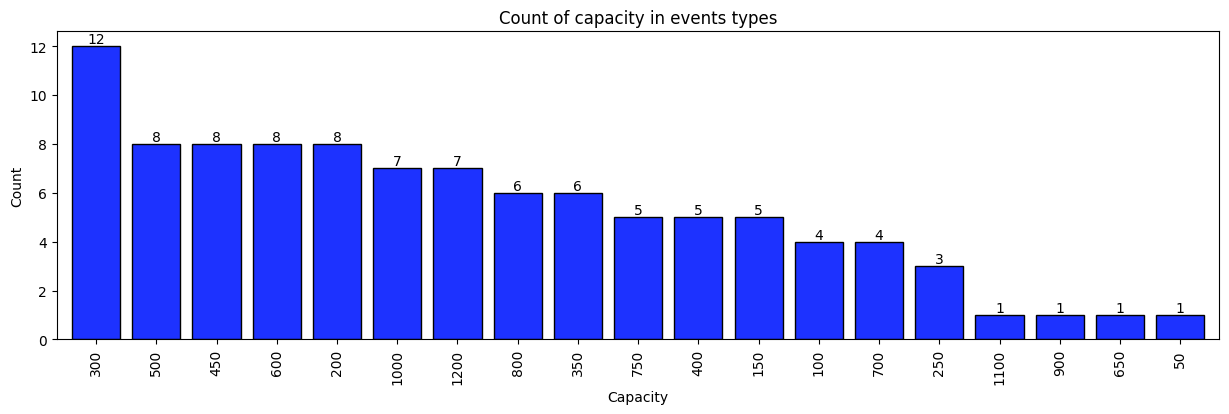

In [79]:
# Create a new figure with a specific size (width=10, height=4)
plt.figure(figsize=(15, 4))

# Create a bar plot showing the count of capacity in events types
ax = events_data['capacity'].value_counts().plot(kind='bar',color='#1D32FF',fontsize=10,edgecolor='black',width=0.8)

# Set the x-axis label
plt.xlabel('Capacity')
# Set the y-axis label
plt.ylabel('Count')
# Set the title of the plot
plt.title('Count of capacity in events types')

# Add text labels to each bar indicating its count
for i, count in enumerate(events_data['capacity'].value_counts()):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Display the plot
plt.show()

C:\Users\abhil\AppData\Local\Temp\ipykernel_18864\4022515398.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db_connection)
C:\Users\abhil\AppData\Local\Temp\ipykernel_18864\4022515398.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db_connection)


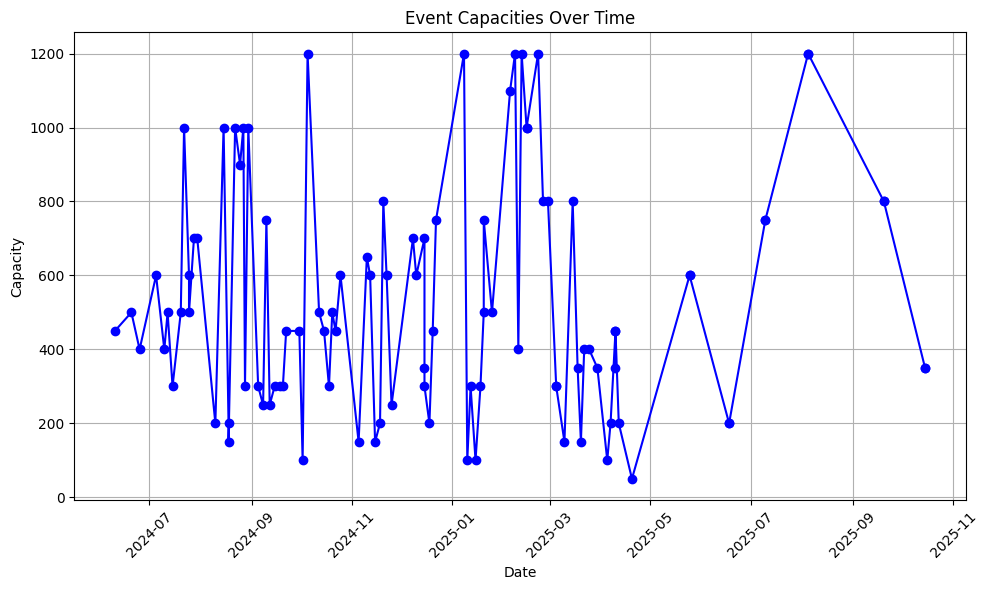

In [26]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for plotting

# Step 1: Establish a connection to the MySQL database
db_connection = mysql.connector.connect(
    host="localhost",  # Replace with your database host
    user="root",  # Replace with your database username
    password="abhi123",  # Replace with your database password
    database="eventmanagement"  # Replace with your database name
)

# Step 2: Execute the SQL query to retrieve the data
query = """
SELECT e.event_id, e.name, e.description, e.date, e.time, e.capacity, l.name AS location_name
FROM Events e
JOIN Locations l ON e.location_id = l.location_id
ORDER BY e.capacity DESC
LIMIT 1;
"""
df = pd.read_sql(query, db_connection)

# Step 3: Load the data into a Pandas DataFrame
# The query results are already loaded into the 'df' DataFrame

query = """
SELECT e.event_id, e.name, e.description, e.date, e.time, e.capacity, l.name AS location_name
FROM Events e
JOIN Locations l ON e.location_id = l.location_id
ORDER BY e.date;
"""
df = pd.read_sql(query, db_connection)

# Step 4: Create a line chart using the retrieved data
# Ensure that 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by date
df.sort_values('date', inplace=True)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['capacity'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Capacity')
plt.title('Event Capacities Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Close the database connection
db_connection.close()

C:\Users\abhil\AppData\Local\Temp\ipykernel_18864\86958352.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db_connection)


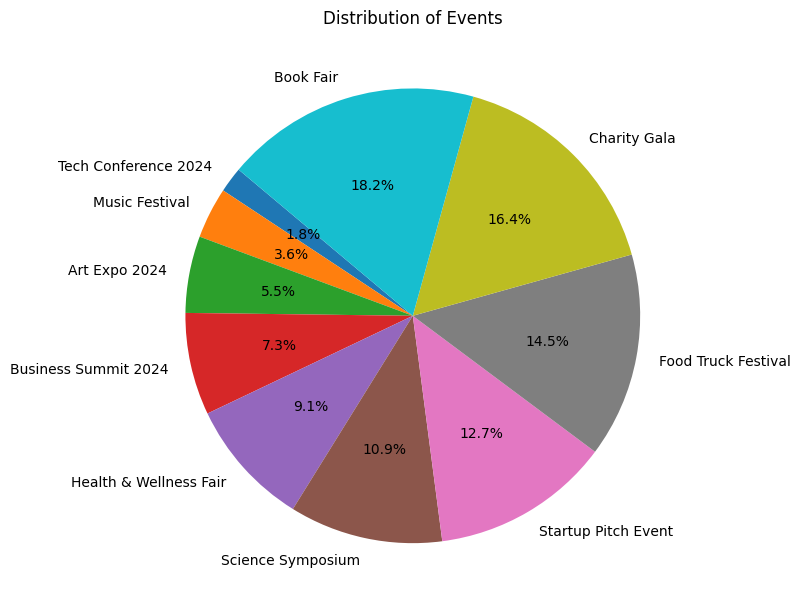

In [27]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for plotting

# Step 1: Establish a connection to the MySQL database
db_connection = mysql.connector.connect(
    host="localhost",  # Replace with your database host
    user="root",  # Replace with your database username
    password="abhi123",  # Replace with your database password
    database="eventmanagement"  # Replace with your database name
)

# Step 2: Execute the SQL query to retrieve the data (limited to 30 rows)
query = """
SELECT e.event_id, e.name AS event_name, e.description, e.date, e.time, l.name AS location_name
FROM Events e
JOIN Locations l ON e.location_id = l.location_id
LIMIT 10;
"""
df = pd.read_sql(query, db_connection)

# Step 3: Load the data into a Pandas DataFrame
# The query results are already loaded into the 'df' DataFrame

# Step 4: Create a pie chart using the retrieved data
plt.figure(figsize=(8, 8))
plt.pie(df['event_id'], labels=df['event_name'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Events')
plt.tight_layout()

# Show the plot
plt.show()

# Close the database connection
db_connection.close()

C:\Users\abhil\AppData\Local\Temp\ipykernel_18864\4098208830.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db_connection)


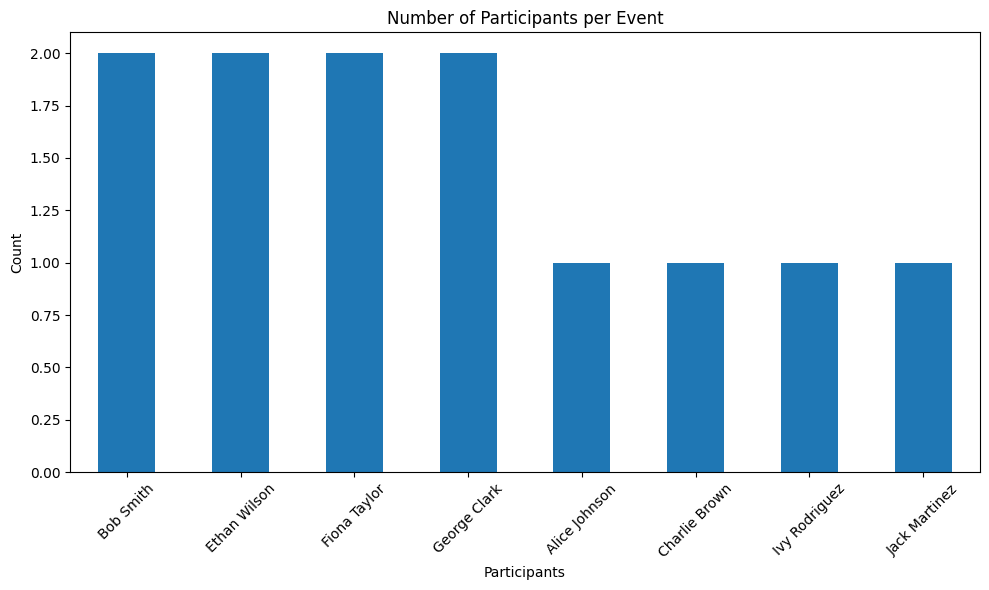

In [1]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for plotting

# Step 1: Establish a connection to the MySQL database
db_connection = mysql.connector.connect(
    host="localhost",  # Replace with your database host
    user="root",  # Replace with your database username
    password="abhi123",  # Replace with your database password
    database="eventmanagement"  # Replace with your database name
)

# Step 2: Execute the SQL query to retrieve the data
query = """
SELECT p.name, p.email 
FROM Participants p
JOIN Feedback f ON p.participant_id = f.participant_id
WHERE f.event_id = 1;
"""
df = pd.read_sql(query, db_connection)

# Step 3: Load the data into a Pandas DataFrame
# The query results are already loaded into the 'df' DataFrame

# Step 4: Create a plot using the retrieved data

participant_count = df['name'].value_counts()

# Plotting the data
plt.figure(figsize=(10, 6))
participant_count.plot(kind='bar')
plt.xlabel('Participants')
plt.ylabel('Count')
plt.title('Number of Participants per Event')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Close the database connection
db_connection.close()


C:\Users\abhil\AppData\Local\Temp\ipykernel_18864\3994669606.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db_connection)


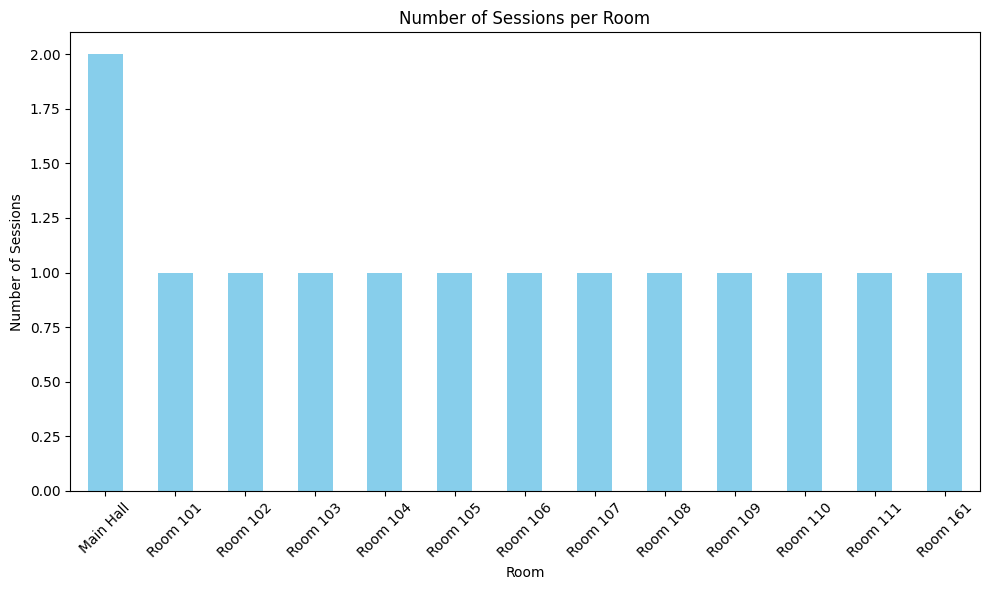

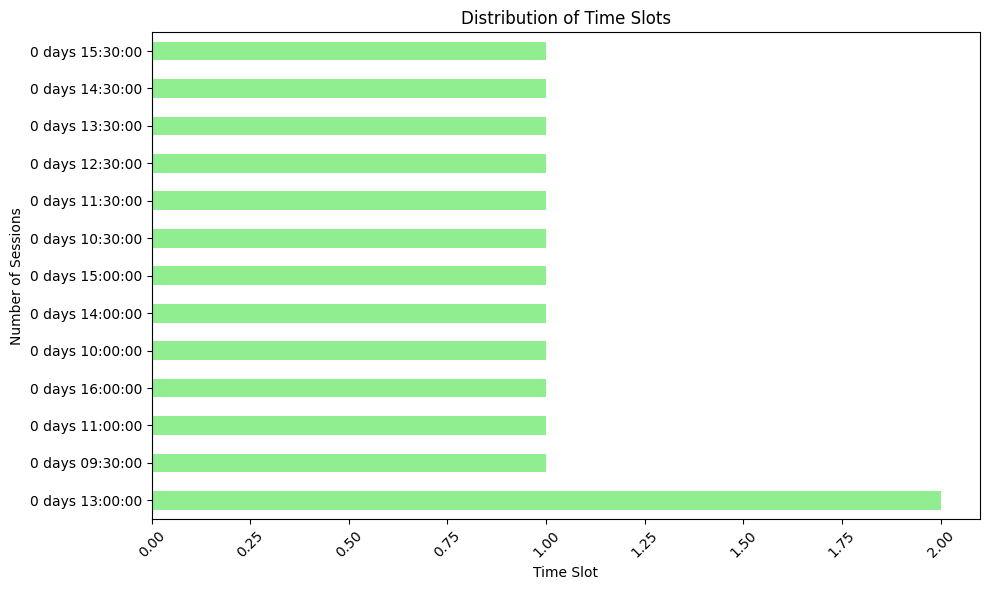

In [5]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for plotting

# Step 1: Establish a connection to the MySQL database
db_connection = mysql.connector.connect(
    host="localhost",  # Replace with your database host
    user="root",  # Replace with your database username
    password="abhi123",  # Replace with your database password
    database="eventmanagement"  # Replace with your database name
)

# Step 2: Execute the SQL query to retrieve the data
query = """
SELECT s.title, s.speaker, s.time_slot, s.room 
FROM Sessions s
WHERE s.event_id = 1;
"""
df = pd.read_sql(query, db_connection)

# Plot 1: Number of sessions per room
room_count = df['room'].value_counts()

plt.figure(figsize=(10, 6))
room_count.plot(kind='bar', color='skyblue')
plt.xlabel('Room')
plt.ylabel('Number of Sessions')
plt.title('Number of Sessions per Room')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Plot 2: Distribution of time slots
time_slot_count = df['time_slot'].value_counts()

plt.figure(figsize=(10, 6))
time_slot_count.plot(kind='barh', color='lightgreen')
plt.xlabel('Time Slot')
plt.ylabel('Number of Sessions')
plt.title('Distribution of Time Slots')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Close the database connection
db_connection.close()


C:\Users\abhil\AppData\Local\Temp\ipykernel_18864\2056662440.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db_connection)


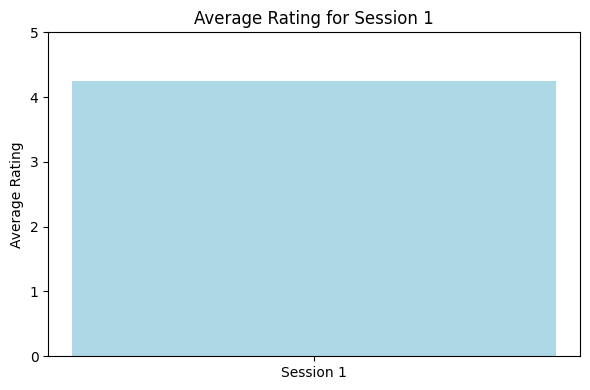

In [15]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for plotting

# Step 1: Establish a connection to the MySQL database
db_connection = mysql.connector.connect(
    host="localhost",  # Replace with your database host
    user="root",  # Replace with your database username
    password="abhi123",  # Replace with your database password
    database="eventmanagement"  # Replace with your database name
)

# Step 2: Execute the SQL query to retrieve the data
query = """
SELECT AVG(f.rating) as average_rating 
FROM Feedback f
WHERE f.session_id = 2;
"""
df = pd.read_sql(query, db_connection)

# Step 3: Load the result into a Pandas DataFrame
# The query results are already loaded into the 'df' DataFrame

# Step 4: Create a plot to visualize the average rating
average_rating = df['average_rating'].iloc[0]

# Plotting the average rating
plt.figure(figsize=(6, 4))
plt.bar(['Session 1'], [average_rating], color='lightblue')
plt.ylim(0, 5)  # Assuming the rating scale is from 0 to 5
plt.ylabel('Average Rating')
plt.title('Average Rating for Session 1')
plt.tight_layout()

# Show the plot
plt.show()

# Close the database connection
db_connection.close()


C:\Users\abhil\AppData\Local\Temp\ipykernel_18864\3020645723.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db_connection)


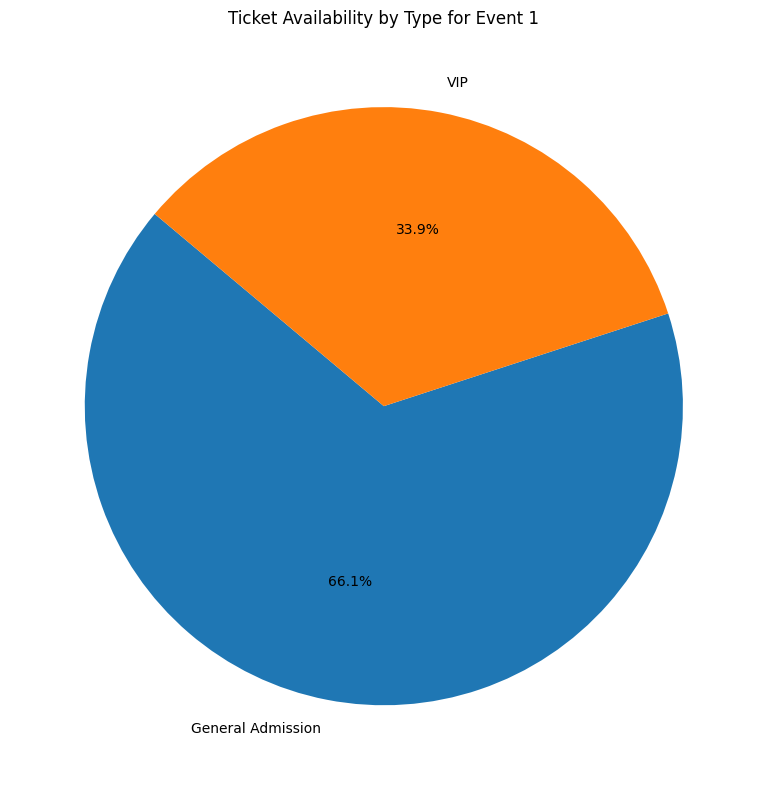

In [16]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for plotting

# Step 1: Establish a connection to the MySQL database
db_connection = mysql.connector.connect(
    host="localhost",  # Replace with your database host
    user="root",  # Replace with your database username
    password="abhi123",  # Replace with your database password
    database="eventmanagement"  # Replace with your database name
)

# Step 2: Execute the SQL query to retrieve the data
query = """
SELECT type, SUM(availability) as total_availability 
FROM Tickets
WHERE event_id = 1
GROUP BY type;
"""
df = pd.read_sql(query, db_connection)

# Step 3: Load the data into a Pandas DataFrame
# The query results are already loaded into the 'df' DataFrame

# Step 4: Create a pie chart using the retrieved data
labels = df['type']
sizes = df['total_availability']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Ticket Availability by Type for Event 1')
plt.tight_layout()

# Show the plot
plt.show()

# Close the database connection
db_connection.close()


C:\Users\abhil\AppData\Local\Temp\ipykernel_18864\3898707163.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db_connection)


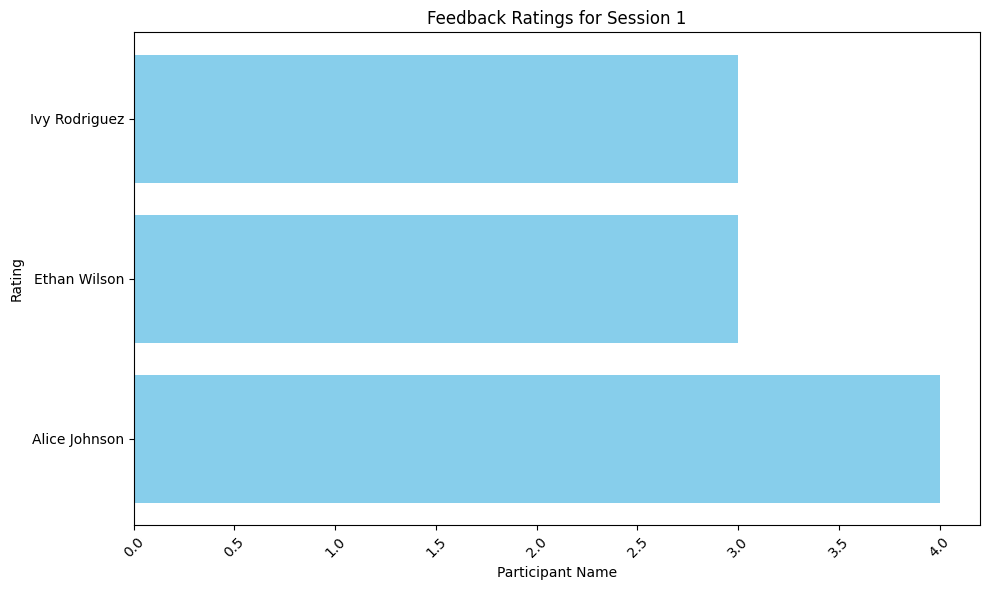

In [28]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for plotting

# Step 1: Establish a connection to the MySQL database
db_connection = mysql.connector.connect(
    host="localhost",  # Replace with your database host
    user="root",  # Replace with your database username
    password="abhi123",  # Replace with your database password
    database="eventmanagement"  # Replace with your database name
)

# Step 2: Execute the SQL query to retrieve the data
query = """
SELECT f.feedback_id, p.name AS participant_name, f.rating, f.comments
FROM Feedback f
JOIN Participants p ON f.participant_id = p.participant_id
WHERE f.session_id = 1;
"""
df = pd.read_sql(query, db_connection)

# Step 3: Load the data into a Pandas DataFrame
# The query results are already loaded into the 'df' DataFrame

# Step 4: Create a bar chart using the retrieved data
plt.figure(figsize=(10, 6))
plt.barh(df['participant_name'], df['rating'], color='skyblue')
plt.xlabel('Participant Name')
plt.ylabel('Rating')
plt.title('Feedback Ratings for Session 1')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Close the database connection
db_connection.close()


C:\Users\abhil\AppData\Local\Temp\ipykernel_18864\2736570605.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db_connection)


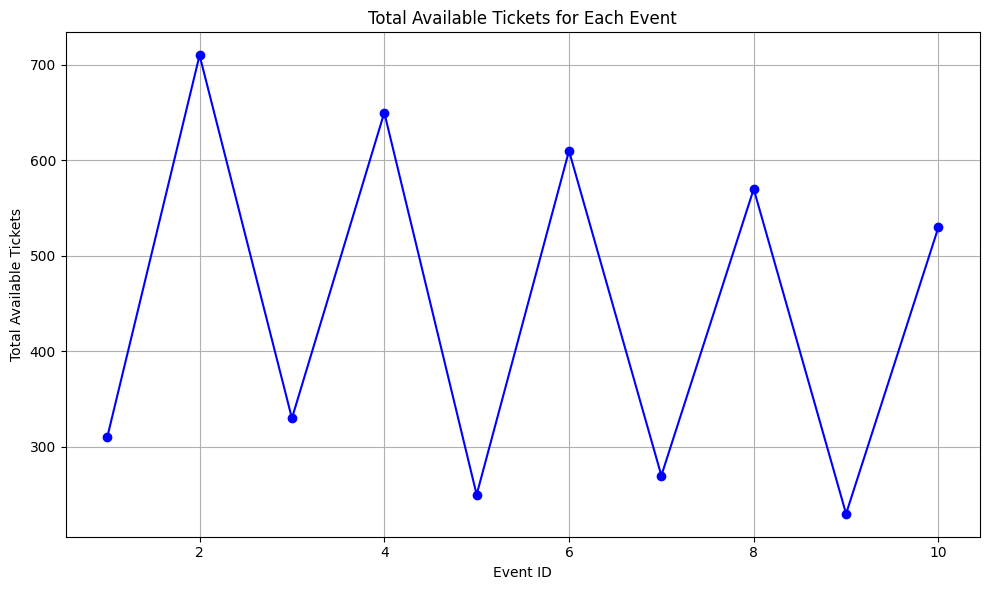

In [20]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for plotting

# Step 1: Establish a connection to the MySQL database
db_connection = mysql.connector.connect(
    host="localhost",  # Replace with your database host
    user="root",  # Replace with your database username
    password="abhi123",  # Replace with your database password
    database="eventmanagement"  # Replace with your database name
)

# Step 2: Execute the SQL query to retrieve the data
query = """
SELECT e.event_id, e.name AS event_name, SUM(t.availability) AS total_available_tickets
FROM Events e
JOIN Tickets t ON e.event_id = t.event_id
GROUP BY e.event_id, e.name
ORDER BY e.event_id;
"""
df = pd.read_sql(query, db_connection)

# Step 3: Load the data into a Pandas DataFrame
# The query results are already loaded into the 'df' DataFrame

# Step 4: Create a line graph using the retrieved data
plt.figure(figsize=(10, 6))
plt.plot(df['event_id'], df['total_available_tickets'], marker='o', linestyle='-', color='b')
plt.xlabel('Event ID')
plt.ylabel('Total Available Tickets')
plt.title('Total Available Tickets for Each Event')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Close the database connection
db_connection.close()


C:\Users\abhil\AppData\Local\Temp\ipykernel_18864\2644935354.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db_connection)


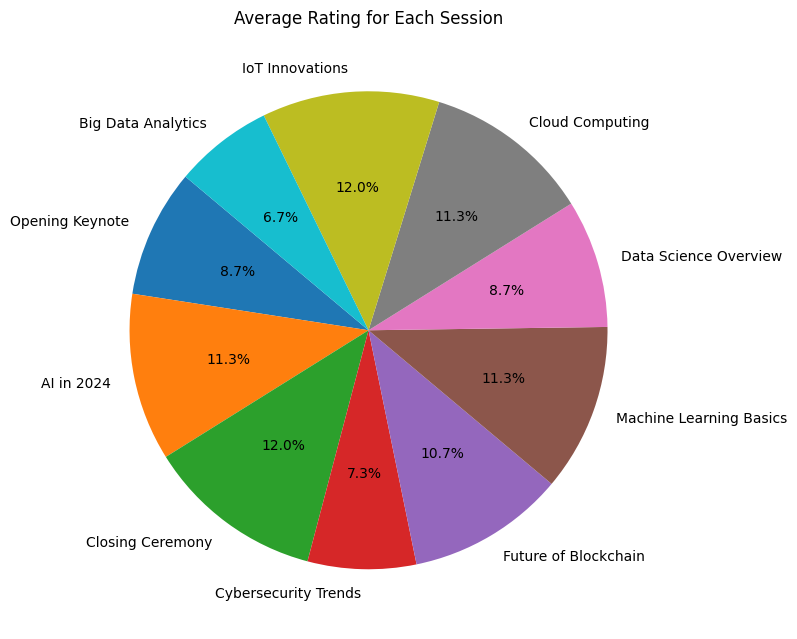

In [25]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for plotting

# Step 1: Establish a connection to the MySQL database
db_connection = mysql.connector.connect(
    host="localhost",  # Replace with your database host
    user="root",  # Replace with your database username
    password="abhi123",  # Replace with your database password
    database="eventmanagement"  # Replace with your database name
)

# Step 2: Execute the SQL query to retrieve the data
query = """
SELECT s.session_id, s.title, AVG(f.rating) AS average_rating
FROM Sessions s
JOIN Feedback f ON s.session_id = f.session_id
GROUP BY s.session_id, s.title limit 10;
"""
df = pd.read_sql(query, db_connection)

# Step 3: Load the data into a Pandas DataFrame
# The query results are already loaded into the 'df' DataFrame

# Step 4: Create a pie chart using the retrieved data
plt.figure(figsize=(8, 8))
plt.pie(df['average_rating'], labels=df['title'], autopct='%1.1f%%', startangle=140)
plt.title('Average Rating for Each Session')
plt.tight_layout()

# Show the plot
plt.show()

# Close the database connection
db_connection.close()


# Conclusion
In conclusion, an Event Management System (EMS) stands as a pivotal solution for modern event organizers, offering a comprehensive suite of tools and functionalities that streamline the entire event lifecycle. By centralizing planning, registration, marketing, onsite management, and post-event analysis, an EMS greatly enhances efficiency and effectiveness in organizing events of all sizes and complexities.

The convenience of online registration and ticketing, coupled with personalized communication and targeted marketing efforts, significantly improves attendee engagement and satisfaction. Seamless coordination among team members and stakeholders, along with robust analytics and reporting features, empowers organizers to make data-driven decisions, optimize event processes, and maximize ROI.